# About Dataset (Скопировано с Kaggle для любителей)

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

**Небольшие пояснялки что обозначают те или иные колонки в нашем Датасете**

**Grade** - Скорость распространения рака, тут проще сказать что делится на некоторые степени.
- Низкая степень (цифра 1)     обычно означает, что рак растет медленнее и вероятность его распространения меньше. 
- Промежуточная степень (цифра 2) означает, что рак растет быстрее, чем рак 1 степени, но медленнее, чем рак 3 степени.
- Высокая степень (цифра 3) означает быстрорастущий рак с большей вероятностью распространения.

**A Stage** 
- Regional -(Стадия I: Рак локализуется на небольшой площади и не распространяется на лимфатические узлы или другие ткани. Стадия II: Рак вырос, но не распространился.)
- Distant  - (Стадия III: Рак увеличился и, возможно, распространился на лимфатические узлы или другие ткани. Стадия IV: Рак распространился на другие органы или области вашего тела.)
              
**Estrogen and Progesterone Status (Статус эстрогена и прогестерона)** - Если клетки рака молочной железы имеют рецепторы эстрогена, рак называется ER-положительным раком молочной железы. Если клетки рака молочной железы имеют рецепторы прогестерона, рак называется PR-положительным раком молочной железы. Если в клетках нет ни одного из этих двух рецепторов, рак называется ER/PR-отрицательным.

**differentiate (Насколько хорошо дифференцированы карциномы)** - Хорошо дифференцированные карциномы имеют относительно нормальные клетки, которые, по-видимому, не растут быстро и располагаются в виде небольших канальцев при протоковом раке и тяжей при дольковом раке. Эти виды рака имеют тенденцию к медленному росту и распространению и имеют лучший прогноз, если переводить на человеческий, то этот признак будет давать нам информацию нашей модели о поталогии распространения раковых клеток в организме наблюдаемых, а значит позволит давать более точные прогнозы по дифференцированности клеток



# Подключаем Библиотеки

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

# Подгружаем Датасет

In [183]:
n_cpu = os.cpu_count()
n_thread = n_cpu*2

In [104]:
df = pd.read_csv("C:\DataSet\Breast_Cancer.csv", delimiter= ',') # В данной строчке указывайте путь к своему файлу (при желании вы можете считвать данные прямо со странички датасета в kaggle)
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


# Первичный анализ данных

In [107]:
df.shape # Выводим краткую инфу о нашем датасете - (число строчек, число колонок)

(4024, 16)

In [105]:
df.describe() # Выводим самые базовые стаистические метрики

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [106]:
df.info() # Информация о колонках, немного о содержимом и типах данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [120]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [121]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [122]:
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

 Давайте посмотрим на данные более внимательно, для этого можно использовать следущие 2 типа отображения данных, которые могут помочь нам найти зависимости одних числовых значений от других, опять же, используем мы только числовые значения т.к искать зависимость имени от условного возраста, во-первых, не имеет никакого смысла, а во-вторых не очень понятно как это делать, поэтому и используются только числовые характеристики 

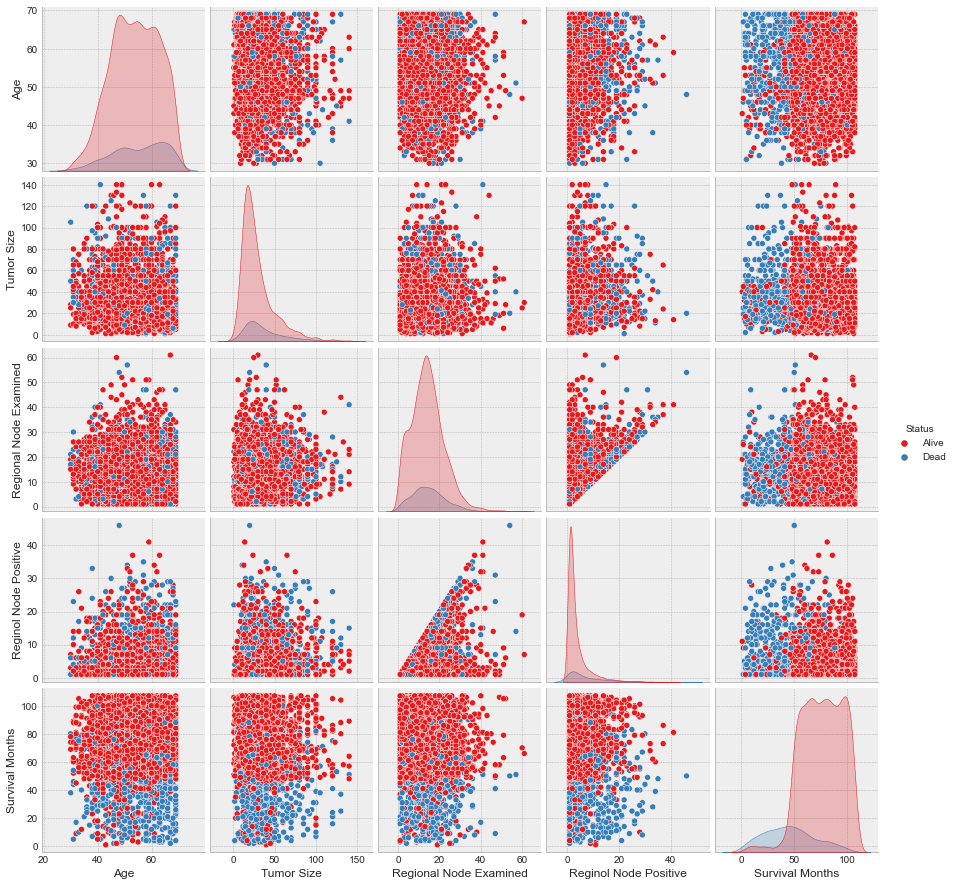

In [127]:
plt.rcParams['font.size']= 10 
sns.pairplot(df,hue='Status', palette='Set1')
# Немного полезных материалов  про sns  -  https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/

<AxesSubplot:>

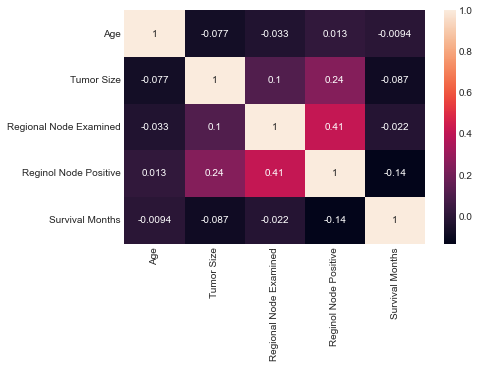

In [123]:
sns.heatmap(df.corr(), annot=True) # Матрица зависимостей числовых значений

# Как вы относитесь к парочке графиков?

**1. Распределение женщин с раком молочной железы по возрасту**

Text(0.5, 1.0, 'Распределение женщин с раком молочной железы по возрасту')

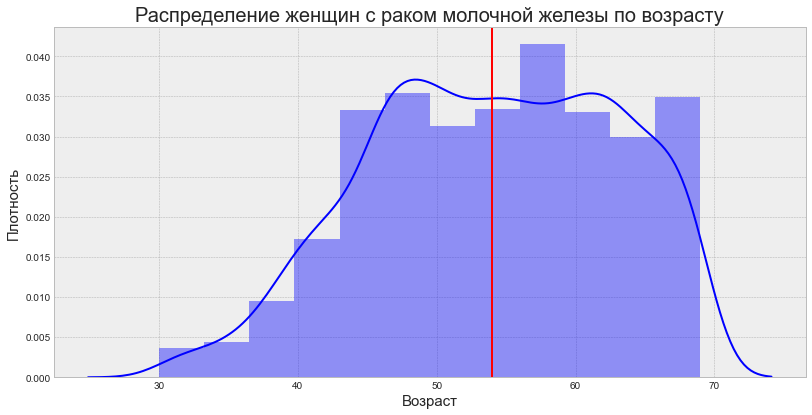

In [88]:
plt.figure(figsize=(12,6))
median_age = df.Age.median()  # Ищем медианный возраст
# Ниже я описываю идею медианы для таких же глупых ребят как и я.
#Во-первых, посмотрите курс по статистике от Анатолия Карпова (https://stepik.org/76)
# Во-вторых: Мы берем наш признак (В данном случае этим признаком выступает возраст), затем берем данные о людях и сортируем их от меньшего к большему
# идем от самого молодого к самому старому в порядке возрастания и выстраиваем их в линию (мне было проще понять так)
# и вот центральный парень в этой ширенге это и будет наша медиана (то есть тот, у которого n человек слева и n справа, если такого элемента нет, то берите 2 центральных элемента, складывайте и делите на 2, вуаля!).
sns.distplot(df.Age, color= 'blue', kde =True,bins = 12 )
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age') # чертим нашу медиану
plt.xlabel('Возраст',fontdict={'fontsize':15})
plt.ylabel('Плотность',fontdict={'fontsize':15})
plt.title("Распределение женщин с раком молочной железы по возрасту",fontdict={'fontsize':20})

# Для графиков в sns вам может быть полезен следующий сайт (https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/)

Как мы видим, самый часто встречающийся возраст где-то между 45-65

In [9]:
df.columns # Выводим название колонок (Cоветую это делать тк бывает полезно посмотреть на колоночки с их названиями)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [54]:
df.Grade.unique()
# Выводим уникальные стадии, видем чепуху, при работе с данными нам будет неудобно работать с текстом и римскими цифрами
# соответственно нужно заменить эти значения на более приемлимый для нас вид, значит редачим :)

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [118]:
df.differentiate.unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [57]:
# Меняем  anaplastic; Grade IV на 4
df['Grade'] = df['Grade'].str.replace("anaplastic; Grade IV",'4')
df.Grade.unique()

array(['3', '2', '1', ' 4'], dtype=object)

array(['3', '2', '1', ' 4'], dtype=object)

**2. Размер опухоли в зависимости от грейда**

Text(0.5, 1.0, 'Размер опухоли в зависимости от Грейда')

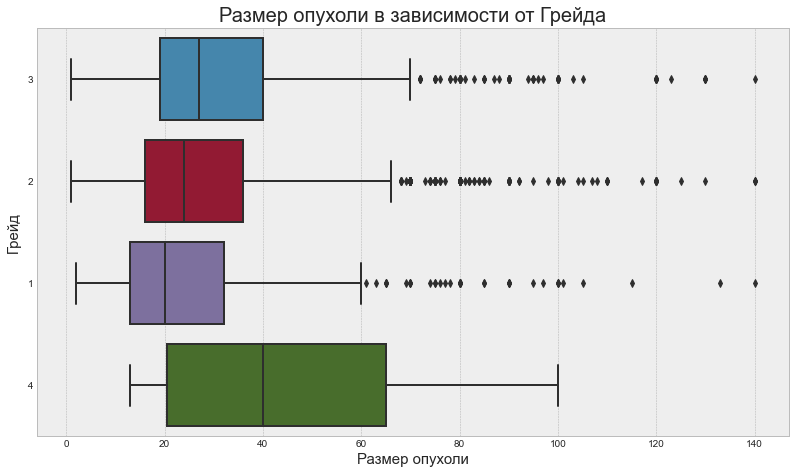

In [87]:
plt.figure(figsize=(12,7))
sns.boxplot('Tumor Size','Grade', data=df) # График с усами 
plt.xlabel('Размер опухоли',fontdict={'fontsize':15})
plt.ylabel('Грейд',fontdict={'fontsize':15})
plt.title("Размер опухоли в зависимости от Грейда",fontdict={'fontsize':20})
# Про ящик говорить много не вижу смысла, просто скажу что график отображает медиану по каждой группе, а также выбросы в наших группах
# Классный видос по ящику с усами - https://www.youtube.com/watch?v=-nifeDLph9U

> Как мы видим, данный анализ приносит свои плоды, у пациентов с Четвертой стадией рака, больше размер опухоли, чем у пациентов с 1, 2, 3 стадиями.


**3. Статус эстрогена и прогестерона на основе Garde при раке молочной железы**

Text(0.5, 1.0, 'Progesterone status for different Grade of Breast Cancer')

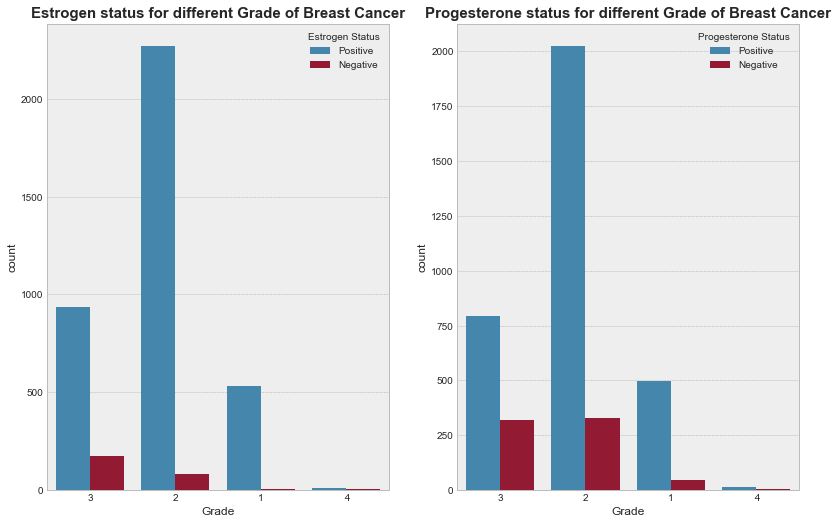

In [86]:

fig, axes = plt.subplots(1, 2,figsize=(12,8)) # то что нам отрисовывает наши графики, если очень грубо 
# цифры 1,2 - это количество строчек и столбцов соответственно, figsize думаю понятно за что отвечает 

sns.countplot(df.Grade, hue=df['Estrogen Status'],ax=axes[0])
axes[0].set_title("Estrogen status for different Grade of Breast Cancer",
                  fontweight="bold",fontdict={'fontsize': 15}) # Задаем первый график (тот что слева)
sns.countplot(df.Grade, hue=df['Progesterone Status'],ax=axes[1]) 
axes[1].set_title("Progesterone status for different Grade of Breast Cancer",fontweight="bold",fontdict={'fontsize': 15}) # Задаем второй график (тот что справа)
# Тут не вижу смысла повторяться, просто скину полезную ссылочку на графики https://pyprog.pro/mpl/mpl_main_components.html

> Как мы можем с вами видеть Grade  2 и 3 имеют больше эстрогена и прогестерона чем Grade 1 и 4 

**4. Размеры опухоли для разных возрастов и месяцев выживания**

Text(0.5, 1.0, 'Размеры опухоли для разных возрастов и месяцев выживания')

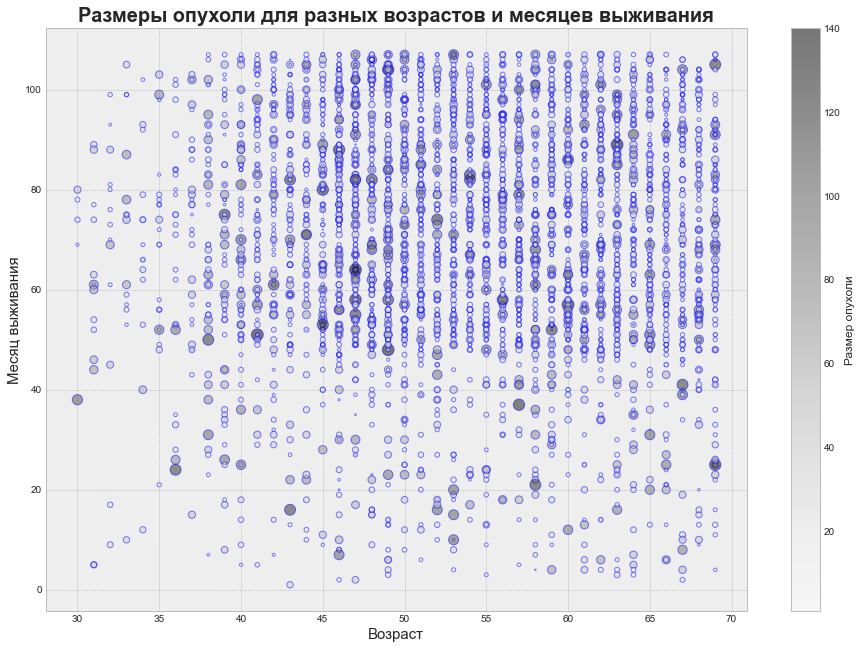

In [117]:
plt.figure(figsize=(14,10))
plt.scatter(df.Age,df['Survival Months'],edgecolors='b',s=df['Tumor Size'],c=df['Tumor Size'], alpha=0.50,linewidth=1)
# Может кому-то будет полезно почитать https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.colorbar().set_label('Размер опухоли')
plt.xlabel("Возраст",fontdict={'fontsize': 15})
plt.ylabel("Месяц выживания",fontdict={'fontsize': 15})
plt.title("Размеры опухоли для разных возрастов и месяцев выживания",fontdict={'fontsize': 20},
          fontweight="bold")

**5. Влияние статуса дифференциации на статус пациента (жив или мертв)**

Text(0.5, 1.0, 'сильно вляет стутус дифференциации на то, будет ли жить пациент или нет')

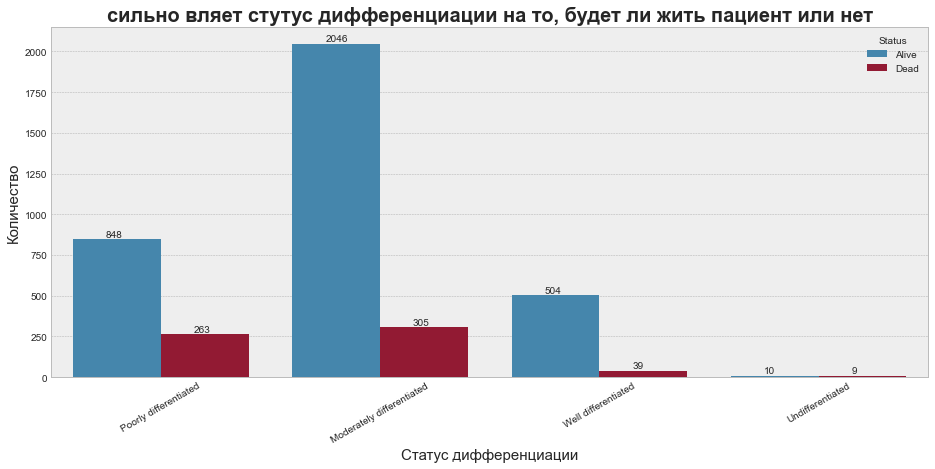

In [103]:
plt.figure(figsize=(14,6))
ax = sns.countplot(df['differentiate'], hue=df['Status']) # countplot считает количество значений в каждой категории.
for p in ax.patches:  
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15)) #  не пугайтесь, я просто тут рисую значения (цифры на графиках) для наглядности
plt.xticks(rotation = 30)
plt.xlabel("Статус дифференциации",fontdict={'fontsize': 15})
plt.ylabel("Количество",fontdict={'fontsize': 15})
plt.title("сильно вляет стутус дифференциации на то, будет ли жить пациент или нет",fontdict={'fontsize': 20},
          fontweight="bold")

> Пациенты с низкодифференцированной и умеренно дифференцированной опухолью чаще умирают, чем с хорошо дифференцированной опухолью. Вероятность смерти пациентов с недифференцированной опухолью составляет 90%, но на это значение мы не можем опипраться, тк данных в нашей выборке недостаточно, чтобы судить об этом.

# Часть 2  подготовка данных для обучения 

Мы провели разведовательный анализ данных и теперь можем спокойно приступать к обучению наших моделей, но для начала нам нужно подготовить некоторые наши данные к этом, как вы видите, некоторые признаки, которые мы с вами рассматиривали, являются категориальными.Чтобы вам было понятнее, я опишу основные виды признаков.


**Типы признаков:**
- Бинарный признак (пол)
- Номинальный признак (профессия)
- Порядковый признак (должность)
- Количественный признак (возраст)

In [128]:
from sklearn.preprocessing import StandardScaler, LabelEncoder # Импортируем необходимые нам  части библиотеки 

In [129]:
df.drop(['Survival Months'], axis=1, inplace=True)

In [130]:
X_num = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']] # Числовые
X_cat = df.drop(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Status'], axis=1) # Категориальные признаки
y = df['Status'] # То что мы предсказываем 

In [220]:
le = LabelEncoder()
y = le.fit_transform(y)
for col in X_cat.columns:
    X_cat[col] = le.fit_transform(X_cat[col])

In [221]:
X = pd.concat([X_num, X_cat], axis=1)

In [222]:
X.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,68,4,24,1,2,1,0,0,0,1,3,1,1,1
1,50,35,14,5,2,1,1,1,2,0,2,1,1,1
2,58,63,14,7,2,0,2,2,4,0,2,1,1,1
3,58,18,2,1,2,1,0,0,0,1,3,1,1,1
4,47,41,3,1,2,1,1,0,1,1,3,1,1,1


In [223]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled = pd.concat([X_scaled, X_cat], axis=1)
y_scaled = y

In [224]:
X_scaled.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,1.565253,-1.253661,1.190676,-0.618172,2,1,0,0,0,1,3,1,1,1
1,-0.443222,0.214345,-0.044095,0.164807,2,1,1,1,2,0,2,1,1,1
2,0.449434,1.540287,-0.044095,0.556296,2,0,2,2,4,0,2,1,1,1
3,0.449434,-0.590691,-1.525820,-0.618172,2,1,0,0,0,1,3,1,1,1
4,-0.777968,0.498475,-1.402343,-0.618172,2,1,1,0,1,1,3,1,1,1


# Часть 3  Обучение модели

In [185]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, plot_precision_recall_curve

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [188]:
model_rl = LogisticRegression(solver='liblinear')
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_lgb = lgb.LGBMClassifier(objective='binary')

In [189]:
param_rl = {
    'penalty':['l1','l2'],
    'C':[0.01,0.1,0.5,0.9,1,5,10],
    'tol':[1e-4,1e-2,1,1e2]
}

In [190]:
GSRL1 = GridSearchCV(model_rl, param_rl, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRL1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [191]:
print('best_param:', GSRL1.best_params_)
print('best_score:', GSRL1.best_score_)

best_param: {'C': 0.5, 'penalty': 'l1', 'tol': 0.0001}
best_score: 0.8475810791517029


In [192]:
pred_rl1 = GSRL1.predict(X_test)
print(classification_report(y_test, pred_rl1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       868
           1       0.59      0.17      0.26       138

    accuracy                           0.87      1006
   macro avg       0.74      0.57      0.59      1006
weighted avg       0.84      0.87      0.84      1006



In [193]:
param_dt = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15],
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10,15],
    'max_features':[None,'sqrt','log2']
}

In [194]:
GSDT1 = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy', n_jobs=n_thread)
GSDT1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [195]:
print('best_param:', GSDT1.best_params_)
print('best_score:', GSDT1.best_score_)

best_param: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 15}
best_score: 0.8442665260892008


In [196]:
param_rf = {
    'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2,5],
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10],
    'max_features':['sqrt']
}

In [197]:
GSRF1 = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRF1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [198]:
print('best_param:', GSRF1.best_params_)
print('best_score:', GSRF1.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
best_score: 0.8495689323800424


In [199]:
pred_rf1 = GSRF1.predict(X_test)
print(classification_report(y_test, pred_rf1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       868
           1       0.62      0.17      0.26       138

    accuracy                           0.87      1006
   macro avg       0.75      0.58      0.60      1006
weighted avg       0.85      0.87      0.84      1006



In [200]:
param_lgb = {
    'num_leaves':[32,64,128],
    'colsample_bytree':[0.8,1],
    'n_estimators':[100,150]
}

In [201]:
GS_LGB1 = GridSearchCV(model_lgb, param_lgb, cv=5, scoring='accuracy', n_jobs=n_thread)
GS_LGB1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=8,
             param_grid={'colsample_bytree': [0.8, 1],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

In [202]:
print('best_param:', GS_LGB1.best_params_)
print('best_score:', GS_LGB1.best_score_)

best_param: {'colsample_bytree': 1, 'n_estimators': 100, 'num_leaves': 32}
best_score: 0.8353195391694946


In [203]:
pred_lgb1 = GS_LGB1.predict(X_test)
print(classification_report(y_test, pred_lgb1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       868
           1       0.39      0.20      0.26       138

    accuracy                           0.85      1006
   macro avg       0.63      0.57      0.59      1006
weighted avg       0.81      0.85      0.82      1006



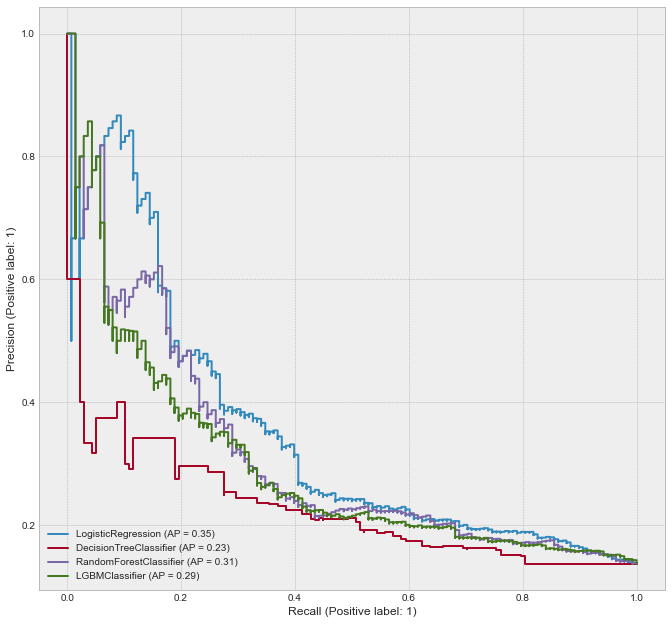

In [204]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plot_precision_recall_curve(GSRL1.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GSDT1.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GSRF1.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GS_LGB1.best_estimator_, X_test, y_test, ax=ax)

## Тестирование

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)

In [206]:
GSRL2 = GridSearchCV(model_rl, param_rl, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRL2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [207]:
print('best_param:', GSRL2.best_params_)
print('best_score:', GSRL2.best_score_)

best_param: {'C': 10, 'penalty': 'l1', 'tol': 0.0001}
best_score: 0.8472488550624362


In [208]:
pred_rl2 = GSRL2.predict(X_test)
print(classification_report(y_test, pred_rl2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       868
           1       0.56      0.18      0.27       138

    accuracy                           0.87      1006
   macro avg       0.72      0.58      0.60      1006
weighted avg       0.84      0.87      0.84      1006



In [209]:
GSDT2 = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy', n_jobs=n_thread)
GSDT2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [211]:
print('best_param:', GSDT2.best_params_)
print('best_score:', GSDT2.best_score_)

best_param: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 15}
best_score: 0.845591029400459


In [212]:
pred_rf2 = GSDT2.predict(X_test)
print(classification_report(y_test, pred_rf2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       868
           1       0.38      0.14      0.21       138

    accuracy                           0.85      1006
   macro avg       0.63      0.55      0.56      1006
weighted avg       0.81      0.85      0.82      1006



In [213]:
GSRF2 = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRF2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [214]:
print('best_param:', GSRF2.best_params_)
print('best_score:', GSRF2.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
best_score: 0.8482438799380582


In [215]:
pred_rf2 = GSRF2.predict(X_test)
print(classification_report(y_test, pred_rf2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       868
           1       0.61      0.10      0.17       138

    accuracy                           0.87      1006
   macro avg       0.74      0.55      0.55      1006
weighted avg       0.84      0.87      0.82      1006



In [216]:
GS_LGB2 = GridSearchCV(model_lgb, param_lgb, cv=5, scoring='accuracy', n_jobs=n_thread)
GS_LGB2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=8,
             param_grid={'colsample_bytree': [0.8, 1],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

In [217]:
print('best_param:', GS_LGB2.best_params_)
print('best_score:', GS_LGB2.best_score_)

best_param: {'colsample_bytree': 1, 'n_estimators': 100, 'num_leaves': 32}
best_score: 0.8353195391694946


In [218]:
pred_lgb2 = GS_LGB2.predict(X_test)
print(classification_report(y_test, pred_lgb2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       868
           1       0.39      0.20      0.26       138

    accuracy                           0.85      1006
   macro avg       0.63      0.57      0.59      1006
weighted avg       0.81      0.85      0.82      1006



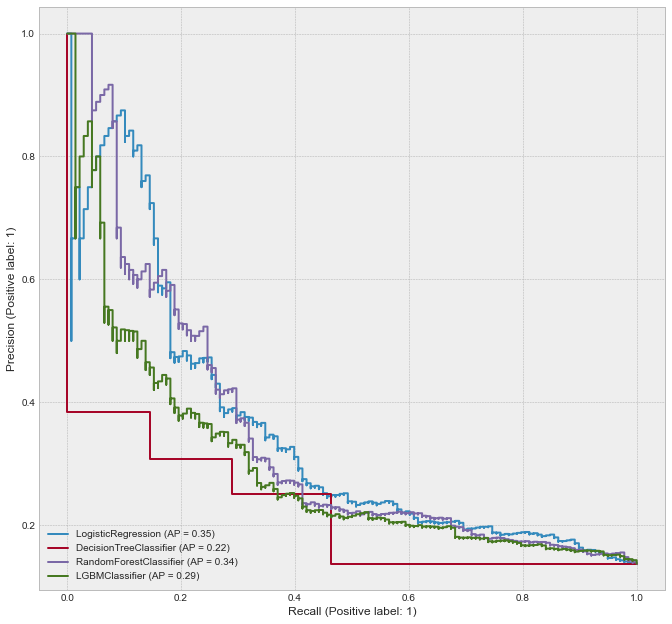

In [219]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plot_precision_recall_curve(GSRL2.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GSDT2.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GSRF2.best_estimator_, X_test, y_test, ax=ax)
plot_precision_recall_curve(GS_LGB2.best_estimator_, X_test, y_test, ax=ax)

# Ссылка на датасет и полезные источники
 * https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
 * https://www.youtube.com/watch?v=HIEe64po7us&list=PL%20dS5g0rco8Fan1hA-bV2DXOyRkXQ&index=27
 * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
 